In [6]:
import torch
import numpy as np
from tqdm.notebook import trange, tqdm
import pickle as pkl

import pandas as pd
image_embeddings = torch.load("../clip_embedded_images.pt").cpu()
text_embeddings = torch.load("../clip_embedded_texts.pt").cpu()
labels = torch.load("../clip_embedded_image_labels.pt").cpu()
# proj = np.load("../imagenet_text2img_upsampled2_balanced_proj400.npy")
proj = np.load("../imagenet_text2img_upsampled5_balanced_proj.npy")
# proj = np.load("/nethome/bdevnani3/flash1/long_tail_lang/proj_matrices/cupl_l2_proj_mi


## test data

test_images = torch.load( "../clip_embedded_images_test.pt").cpu()
test_labels = torch.load( "../clip_embedded_labels_test.pt").cpu()

In [7]:
freqs = {}
for label in labels:
    label = label.item()
    if label not in freqs:
        freqs[label] = 0
    freqs[label] +=1
    
label_cats = {"many":[], "med":[], "few":[]}
for label in set(labels):
    label = label.item()
    if freqs[label] > 100:
        label_cats["many"].append(label)
    elif freqs[label] > 20:
        label_cats["med"].append(label)
    else:
        label_cats["few"].append(label)

In [8]:
label_cats

{'many': [694,
  920,
  587,
  97,
  117,
  374,
  335,
  398,
  519,
  537,
  272,
  519,
  828,
  477,
  566,
  767,
  820,
  907,
  807,
  767,
  453,
  2,
  624,
  775,
  371,
  830,
  958,
  549,
  819,
  920,
  311,
  281,
  882,
  817,
  668,
  247,
  336,
  309,
  353,
  417,
  21,
  108,
  276,
  806,
  464,
  566,
  148,
  827,
  490,
  398,
  832,
  519,
  855,
  485,
  903,
  787,
  593,
  473,
  396,
  3,
  674,
  348,
  805,
  899,
  554,
  2,
  335,
  984,
  816,
  68,
  465,
  557,
  537,
  161,
  924,
  892,
  133,
  870,
  253,
  423,
  460,
  19,
  454,
  97,
  465,
  870,
  775,
  191,
  89,
  652,
  875,
  466,
  519,
  886,
  464,
  396,
  437,
  674,
  806,
  479,
  219,
  402,
  566,
  548,
  201,
  732,
  652,
  86,
  768,
  755,
  261,
  253,
  765,
  827,
  46,
  899,
  922,
  573,
  329,
  404,
  325,
  832,
  131,
  585,
  548,
  882,
  29,
  55,
  951,
  89,
  97,
  763,
  770,
  571,
  126,
  799,
  687,
  528,
  984,
  820,
  501,
  762,
  779,
  244,
  

In [9]:
import seaborn as sns
from classes import CLASSES

In [10]:
model_path = "/nethome/bdevnani3/flash1/long_tail_lang/results_sklearn/config_convex_comb_1/13-Sep-2022-00-50-56/final_model.sav"
model = pkl.load(open(model_path, 'rb'))
cc_predictions = model.predict(test_images.cpu())
cc_true_labels = test_labels.cpu()

In [376]:
cc_results = np.equal(cc_predictions,cc_true_labels)
len(cc_results)

50000

In [11]:
model_path = "/nethome/bdevnani3/flash1/long_tail_lang/results_sklearn/config_image_linear_probe_0/12-Sep-2022-20-47-57/final_model.sav"
model = pkl.load(open(model_path, 'rb'))
lp_predictions = model.predict(test_images.cpu())
lp_true_labels = test_labels.cpu()

In [12]:
lp_results = np.equal(lp_predictions,lp_true_labels)
len(lp_results)

50000

In [14]:
cls = 992
(print("Class name:", CLASSES[cls]))
for cat in label_cats:
    if cls in label_cats[cat]:
        print(f"{cat} Category, {freqs[cls]}")

Class name: agaric
few Category, 19


torch.Size([126, 1024])
Explained variation per principal component: [0.44842011 0.07624537 0.04690791]
[t-SNE] Computing 125 nearest neighbors...
[t-SNE] Indexed 126 samples in 0.000s...


/nethome/bdevnani3/flash1/miniconda3/envs/ltr/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/nethome/bdevnani3/flash1/miniconda3/envs/ltr/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 126 samples in 0.155s...
[t-SNE] Computed conditional probabilities for sample 126 / 126
[t-SNE] Mean sigma: 0.191439
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.978371
[t-SNE] KL divergence after 300 iterations: 0.172040
torch.Size([19, 1024]) torch.Size([19, 1024]) torch.Size([19, 1024]) torch.Size([19, 1024]) torch.Size([50, 1024])
39 Correct
0 Missed


Text(0.5, 1.0, 'Class name:agaric 992')

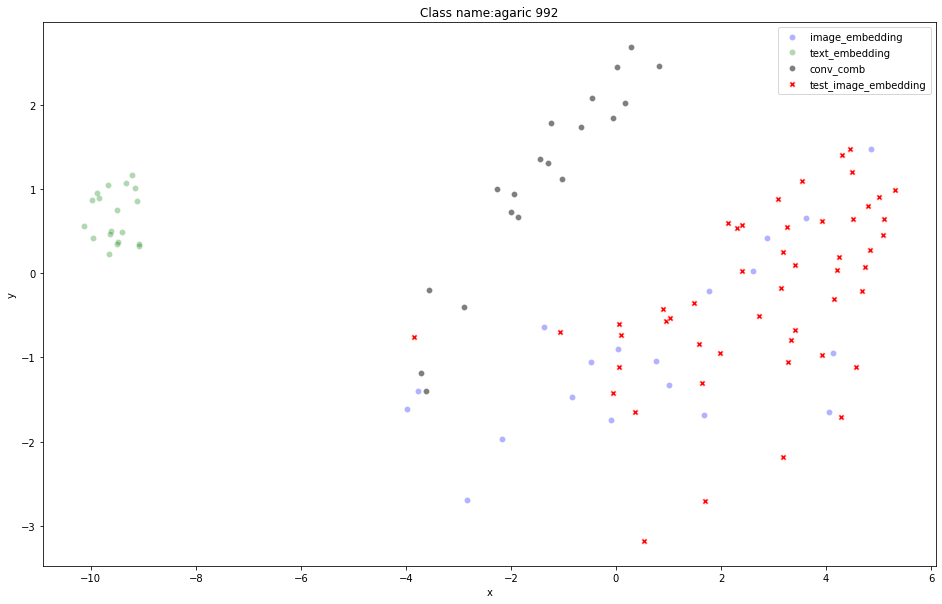

In [421]:
cc_results = np.equal(cc_predictions,cc_true_labels)
lp_results = np.equal(lp_predictions,lp_true_labels)

cls_idx = np.where(labels == cls)
cls_image_embeddings = image_embeddings[cls_idx]
cls_text_embeddings = text_embeddings[cls_idx]
cls_labels = labels[cls_idx]

cls_idx = np.where(test_labels == cls)
test_image_embeddings = test_images[cls_idx]

cc_results = cc_results[cls_idx]
lp_results = lp_results[cls_idx]

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
data_proj = np.matmul(cls_text_embeddings.cpu(), proj)
data_proj = data_proj / np.linalg.norm(data_proj, axis=-1, keepdims=True)
data_proj = 0.25*(data_proj) + 0.75*(cls_image_embeddings)
convex_comb = 0.25*(cls_text_embeddings) + 0.75*(cls_image_embeddings)
pca_input = torch.cat([cls_image_embeddings,cls_text_embeddings, data_proj, convex_comb, test_image_embeddings])
print(pca_input.shape)
pca_result = pca.fit_transform(pca_input)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)

print(cls_image_embeddings.shape, cls_text_embeddings.shape, data_proj.shape, convex_comb.shape, test_image_embeddings.shape)

n = len(cls_image_embeddings)

tsne_im,tsne_text, tsne_text_proj, tsne_convex_comb, tsne_im_test \
= tsne_results[0:n, :], tsne_results[n: (n*2), :], tsne_results[(n*2):(n*3), :], tsne_results[(n*3):(n*4), :], tsne_results[(n*4):, :]

tsne_im_df = pd.DataFrame()
tsne_im_df["x"] = tsne_im[:,0]
tsne_im_df["y"] = tsne_im[:,1]

tsne_text_df = pd.DataFrame()
tsne_text_df["x"] = tsne_text[:,0]
tsne_text_df["y"] = tsne_text[:,1]

tsne_text_proj_df = pd.DataFrame()
tsne_text_proj_df["x"] = tsne_text_proj[:,0]
tsne_text_proj_df["y"] = tsne_text_proj[:,1]

tsne_convex_comb_df = pd.DataFrame()
tsne_convex_comb_df["x"] = tsne_convex_comb[:,0]
tsne_convex_comb_df["y"] = tsne_convex_comb[:,1]

tsne_im_test_df = pd.DataFrame()
tsne_im_test_df["x"] = tsne_im_test[:,0]
tsne_im_test_df["y"] = tsne_im_test[:,1]

import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",
    data=tsne_im_df,
#     legend="image_embedding",
    alpha=0.3,
    color="b",
    label="image_embedding"
)

sns.scatterplot(
    x="x", y="y",
    data=tsne_text_df,
#     legend="text_embedding",
    alpha=0.3,
    color="g",
    label="text_embedding"
)

# sns.scatterplot(
#     x="x", y="y",
#     data=tsne_text_proj_df,
# #     legend="proj_text_embedding",
#     alpha=0.3,
#     color="r",
#     label="proj_text_embedding"
# )

sns.scatterplot(
    x="x", y="y",
    data=tsne_convex_comb_df,
#     legend="proj_text_embedding",
    alpha=0.5,
    color="k",
    label="conv_comb"
)

sns.scatterplot(
    x="x", y="y",
    data=tsne_im_test_df,
#     legend="proj_text_embedding",
    alpha=1,
    color="r",
    marker = "X",
    label="test_image_embedding"
)


# cc_results = cc_results[cls_idx]
# lp_results = lp_results[cls_idx]

idx = np.logical_and(np.logical_xor(cc_results>0, lp_results>0), cc_results>0).numpy().astype("bool")
# idx = pd.Series(np.where(idx))

print(sum(idx), "Correct")

tsne_im_test_df_corr = pd.DataFrame()
tsne_im_test_df_corr["x"] = pd.Series(tsne_im_test[idx,0])
tsne_im_test_df_corr["y"] = pd.Series(tsne_im_test[idx,1])

# sns.scatterplot(
#     x="x", y="y",
#     data=tsne_im_test_df_corr,
# #     legend="proj_text_embedding",
#     alpha=1,
#     color="g",
#     marker = "X",
#     label="test_image_embedding_corr"
# )

idx = np.logical_and(np.logical_xor(cc_results>0, lp_results>0), cc_results<1).numpy().astype("bool")

print(sum(idx), "Missed")

tsne_im_test_df_wrong = pd.DataFrame()
tsne_im_test_df_wrong["x"] = pd.Series(tsne_im_test[idx,0])
tsne_im_test_df_wrong["y"] = pd.Series(tsne_im_test[idx,1])

# sns.scatterplot(
#     x="x", y="y",
#     data=tsne_im_test_df_wrong,
# #     legend="proj_text_embedding",
#     alpha=1,
#     color="r",
#     marker = "X",
#     label="test_image_embedding_missed"
# )

plt.title("Class name:" +CLASSES[cls] + " " + str(cls))

# plt.axis([-20, 20, -20, 20])


In [ ]:
# tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=300)

# # Worst performing classes


# fig, axes = plt.subplots(4,5)
# # fig, axes = plt.subplots(2,2)
# fig.suptitle('Worst performing classes')
# fig.set_figheight(40)
# fig.set_figwidth(50)


# performance = [-16.0, -13.5, -13.0, -12.0, -11.0, -10.0, -10.0, -9.0, -9.0, -8.5, 11.0, 11.5, 11.5, 12.0, 12.5, 13.0, 14.5, 15.5, 19.0, 19.5]
# # performance = [-16.0, -13.5, 19.0, 19.5]


# x = 0
# y = 0

# for i,label in tqdm(enumerate([947, 46, 52, 235, 257, 587, 828, 119, 725, 824, 849, 307, 222, 376, 162, 40, 878, 301, 82, 992])):
# # for i,label in tqdm(enumerate([947, 46, 82, 992])):

    
#     x = int(i/5)
#     y = int(i%5)
    
#     cls_idx = np.where(labels == label)
#     cls_image_embeddings = image_embeddings[cls_idx]
#     cls_text_embeddings = text_embeddings[cls_idx]
#     cls_labels = labels[cls_idx]

#     cls_idx = np.where(test_labels == label)
#     test_image_embeddings = test_images[cls_idx]

#     from sklearn.decomposition import PCA
#     pca = PCA(n_components=3)
#     data_proj = np.matmul(cls_text_embeddings.cpu(), proj)
#     data_proj = data_proj / np.linalg.norm(data_proj, axis=-1, keepdims=True)
#     data_proj = 0.25*(data_proj) + 0.75*(cls_image_embeddings)
#     convex_comb = 0.25*(cls_text_embeddings) + 0.75*(cls_image_embeddings)
#     pca_input = torch.cat([cls_image_embeddings,cls_text_embeddings, data_proj, convex_comb, test_image_embeddings])
#     print(pca_input.shape)
#     pca_result = pca.fit_transform(pca_input)

#     print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

#     from sklearn.manifold import TSNE

#     tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
#     tsne_results = tsne.fit_transform(pca_result)

#     print(cls_image_embeddings.shape, cls_text_embeddings.shape, data_proj.shape, convex_comb.shape, test_image_embeddings.shape)

#     n = len(cls_image_embeddings)

#     tsne_im,tsne_text, tsne_text_proj, tsne_convex_comb, tsne_im_test \
#     = tsne_results[0:n, :], tsne_results[n: (n*2), :], tsne_results[(n*2):(n*3), :], tsne_results[(n*3):(n*4), :], tsne_results[(n*4):, :]

#     tsne_im_df = pd.DataFrame()
#     tsne_im_df["x"] = tsne_im[:,0]
#     tsne_im_df["y"] = tsne_im[:,1]

#     tsne_text_df = pd.DataFrame()
#     tsne_text_df["x"] = tsne_text[:,0]
#     tsne_text_df["y"] = tsne_text[:,1]

#     tsne_text_proj_df = pd.DataFrame()
#     tsne_text_proj_df["x"] = tsne_text_proj[:,0]
#     tsne_text_proj_df["y"] = tsne_text_proj[:,1]

#     tsne_convex_comb_df = pd.DataFrame()
#     tsne_convex_comb_df["x"] = tsne_convex_comb[:,0]
#     tsne_convex_comb_df["y"] = tsne_convex_comb[:,1]

#     tsne_im_test_df = pd.DataFrame()
#     tsne_im_test_df["x"] = tsne_im_test[:,0]
#     tsne_im_test_df["y"] = tsne_im_test[:,1]

#     import matplotlib.pyplot as plt
    
#     sns.scatterplot(
#         x="x", y="y",
#         data=tsne_im_df,
#     #     legend="image_embedding",
#         alpha=0.3,
#         color="b",
# #         label="image_embedding",
#         ax=axes[x][y]
#     )

#     sns.scatterplot(
#         x="x", y="y",
#         data=tsne_text_df,
#     #     legend="text_embedding",
#         alpha=0.3,
#         color="g",
# #         label="text_embedding",
#         ax=axes[x][y]
#     )

#     # sns.scatterplot(
#     #     x="x", y="y",
#     #     data=tsne_text_proj_df,
#     # #     legend="proj_text_embedding",
#     #     alpha=0.3,
#     #     color="r",
#     #     label="proj_text_embedding"
#     # )

#     sns.scatterplot(
#         x="x", y="y",
#         data=tsne_convex_comb_df,
#     #     legend="proj_text_embedding",
#         alpha=0.3,
#         color="k",
# #         label="conv_comb",
#         ax=axes[x][y]
#     )

#     sns.scatterplot(
#         x="x", y="y",
#         data=tsne_im_test_df,
#     #     legend="proj_text_embedding",
#         alpha=1,
#         color="r",
#         marker = "X",
# #         label="test_image_embedding",
#         ax=axes[x][y]
#     )

#     axes[x][y].set_title("Class name:" +CLASSES[cls] + " " + str(performance[i]))

#     axes[x][y].axis([-20, 20, -20, 20])
    
    
# fig.savefig("/nethome/bdevnani3/flash1/long_tail_lang/analysis/plots/emb_plots.png")